# Labelled Predictions Analysis

In [1]:
import os
import json
import pandas as pd
import numpy as np

import config
import matplotlib.pyplot as plt
from pprint import pprint
from torchvision import transforms

import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
attribute_names = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 
                       'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 
                       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
                       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 
                       'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
                       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 
                       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']

In [3]:
def read_pred_accuracy_json(tpfile):
    all_accs = pd.DataFrame(index = attribute_names)
    all_accs.index.name = "Attributes"
    for dirt in os.listdir(config.INFERENCE_DIR):
        dirpath = os.path.join(config.INFERENCE_DIR, dirt)
        if os.path.isdir(dirpath): 
            for run in os.listdir(dirpath):
                runpath = os.path.join(dirpath, run)
                if os.path.isdir(runpath): 
                    for filename in os.listdir(runpath):
                        if filename == tpfile:
                            tpfile_path = os.path.join(runpath,tpfile)
                            tpjson = json.load(open(tpfile_path))
                            acc = pd.DataFrame.from_dict(tpjson, orient='index', columns=[run])
                            acc.index.name = "Attributes"
                            acc = acc.round(decimals=2)
                            all_accs = all_accs.merge(acc, left_index=True, right_on="Attributes")
    return all_accs
                        
    
all_test_accs = read_pred_accuracy_json("test_preds.json") # val_preds.json
# for report 
all_test_accs2 = all_test_accs.transpose()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(all_test_accs2.loc[:,'5_o_Clock_Shadow':'High_Cheekbones'])
    display(all_test_accs2.loc[:,'Male':'Young'])

Attributes,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones
20201020_011817,94.93,84.27,83.37,85.74,99.04,96.34,71.51,84.79,90.36,96.17,96.52,89.75,92.99,95.93,96.53,99.68,97.53,98.25,92.03,88.08
20201020_100816,94.90,84.36,82.84,85.49,99.09,96.09,72.09,84.70,90.62,96.06,96.37,89.40,92.94,95.89,96.59,99.70,97.66,98.31,91.99,88.00


Attributes,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
20201020_011817,98.61,94.09,97.05,87.84,96.49,76.84,97.27,77.83,94.05,95.31,97.97,93.32,84.78,85.30,90.83,99.09,94.28,87.75,96.97,89.01
20201020_100816,98.63,94.22,97.01,87.77,96.54,76.39,97.30,77.76,93.94,95.18,98.01,93.26,84.50,85.17,90.93,99.12,93.79,87.81,96.97,88.75


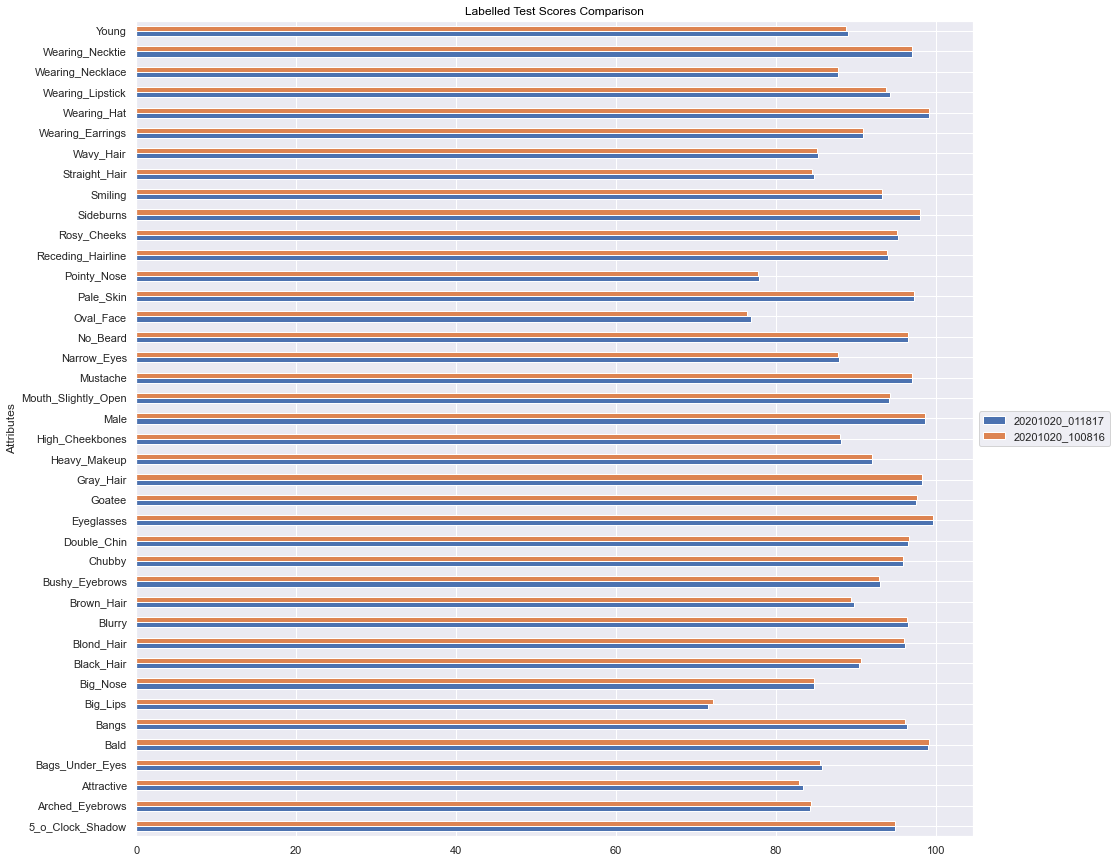

In [4]:
f = plt.figure()
plt.title('Labelled Test Scores Comparison', color='black')
all_test_accs.plot(kind='barh', figsize=(15, 15), ax=f.gca())
# for p in f.gca().patches:
#     value = round(p.get_width(),2)
#     f.gca().annotate(str(value), xy=(p.get_width(), p.get_y()))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [5]:
all_val_accs = read_pred_accuracy_json("val_preds.json") # val_preds.json
# for report 
all_val_accs2 = all_val_accs.transpose()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(all_val_accs2.loc[:,'5_o_Clock_Shadow':'High_Cheekbones'])
    display(all_val_accs2.loc[:,'Male':'Young'])

Attributes,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones
20201020_011817,94.69,86.67,82.02,85.25,99.12,96.15,85.28,83.64,92.12,96.04,96.82,86.34,93.07,95.88,96.97,99.6,96.94,98.17,92.99,88.99
20201020_100816,94.45,86.65,81.67,84.70,98.96,96.16,83.51,83.76,91.70,95.81,96.84,85.47,92.96,95.69,96.64,99.6,96.90,98.04,92.93,88.93


Attributes,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
20201020_011817,98.90,94.28,96.45,93.92,96.53,76.61,97.01,77.99,94.90,95.23,97.55,93.56,85.55,87.07,92.19,99.11,93.15,89.21,96.62,88.68
20201020_100816,98.95,94.45,96.22,93.50,96.30,76.32,97.06,77.74,95.02,95.15,97.42,93.42,85.21,86.84,92.34,99.10,92.93,89.48,96.64,88.40


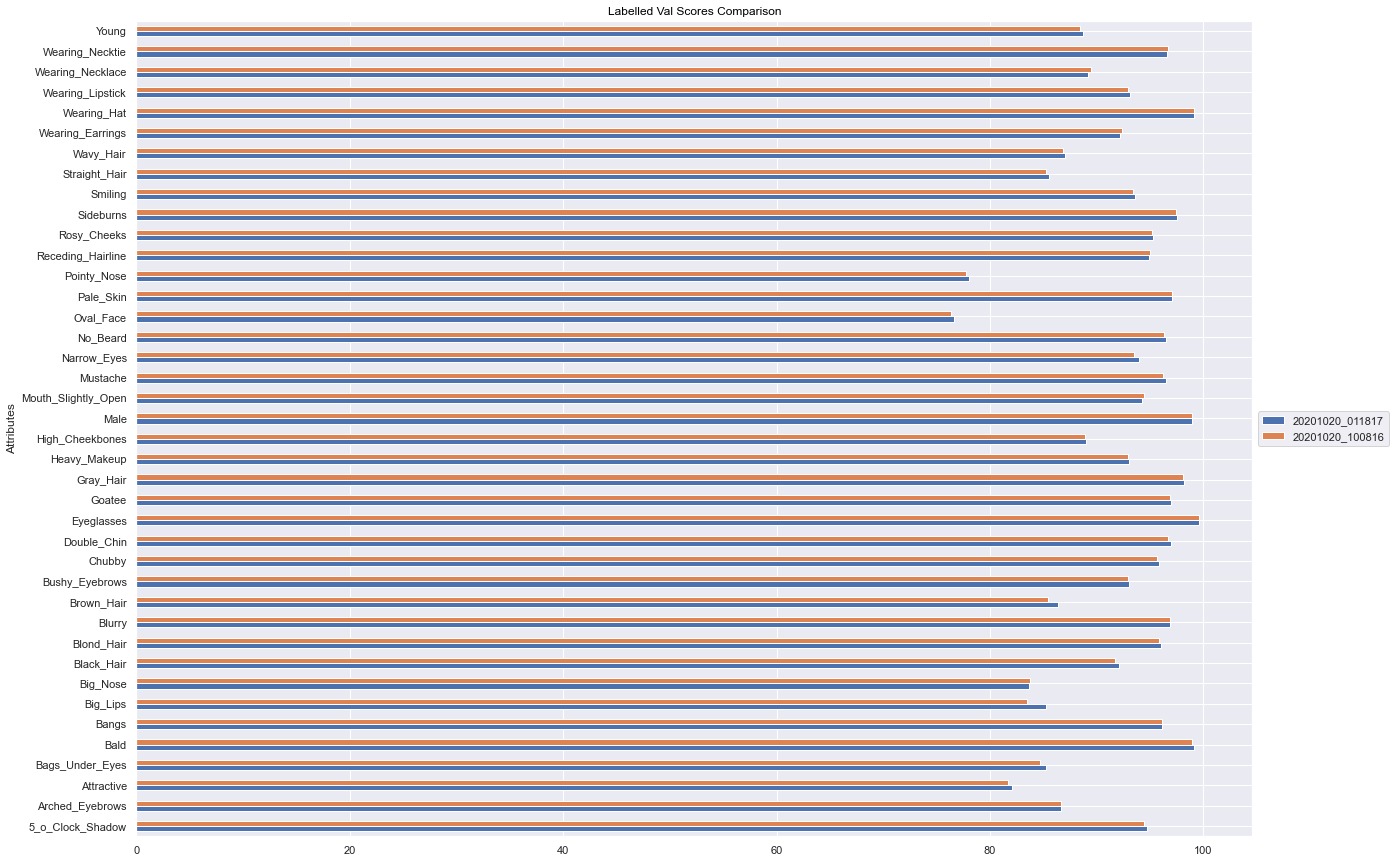

In [6]:
f = plt.figure()
plt.title('Labelled Val Scores Comparison', color='black')
all_val_accs.plot(kind='barh', figsize=(20, 15), ax=f.gca())
# for p in f.gca().patches:
#     value = round(p.get_width(),2)
#     f.gca().annotate(str(value), xy=(p.get_width(), p.get_y()))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Select the best model prediction based on all high scoring models (NOT IN USE)
+ Inspired by Ensemble methods, BUT NOT USING ENSEMBLE PREDICTIONS FOR SUBMISSION!
+ Create a most commonly predicted attributes dataframe based on median of all model predictions
+ Compare all model predictions differences between most common predicted and choose the predictions with the lowest differences i.e. generally predicted the same attributes as the other models.
+ Requires 3+ good models!!

In [7]:
pfile = "predictions.csv"
all_preds = []
for dirt in os.listdir(config.INFERENCE_DIR):
    dirpath = os.path.join(config.INFERENCE_DIR, dirt)
    if os.path.isdir(dirpath): 
        for filename in os.listdir(dirpath):
            if filename == pfile:
                pfile_path = os.path.join(dirpath,pfile)
                pprint(pfile_path)
                pred = pd.read_csv(pfile_path, index_col=0)
                all_preds.append((pred, dirt))
                #print(pred)
print(f"{len(all_preds)} predictions loaded.")

'inf\\FaceAttrMobileNetV2_50_42_s0e80_tb100_vb100_MU_FL_SGD_53_lr0.01_wd0.0001_ReduceLROnPlateau\\predictions.csv'
'inf\\FaceAttrResNeXt_50_42_s0e80_tb128_vb128_MU_FL_SGD_52_lr0.01_wd0.0001_ReduceLROnPlateau\\predictions.csv'
2 predictions loaded.


In [8]:
all_preds[1][0]

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
Images,,,,,,,,,,,,,,,,,,,,,
Aaron_Eckhart_0001.jpg,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
Aaron_Guiel_0001.jpg,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
Aaron_Patterson_0001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Aaron_Peirsol_0001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,-1,-1,-1,1
Aaron_Peirsol_0002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zorica_Radovic_0001.jpg,-1,-1,-1,1,-1,1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Zulfiqar_Ahmed_0001.jpg,-1,-1,-1,1,-1,-1,-1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Zumrati_Juma_0001.jpg,-1,-1,-1,-1,-1,-1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [9]:
def get_most_common_predictions(all_preds):
    most_common_pred = pd.DataFrame(index=all_preds[0][0].index)

    for column in attribute_names:
        column_data = []
        for i in range(len(all_preds)):
            column_data.append(all_preds[i][0][column])
        most_common_pred[column] = np.median(column_data, axis=0)
    return most_common_pred

most_common_pred = get_most_common_predictions(all_preds)

In [10]:
def get_highest_scoring_prediction_id(all_preds, most_common_pred):
    pred_diffs = {}
    for mpred, model in all_preds:
        diff_df = most_common_pred.compare(mpred, align_axis=0)
        pred_diffs[model] = np.sum(diff_df.count()) // 2
    pprint(pred_diffs)
    return min(pred_diffs, key=pred_diffs.get)

pprint(f"Most common predictions model: {get_highest_scoring_prediction_id(all_preds, most_common_pred)}")

{'FaceAttrMobileNetV2_50_42_s0e80_tb100_vb100_MU_FL_SGD_53_lr0.01_wd0.0001_ReduceLROnPlateau': 20047,
 'FaceAttrResNeXt_50_42_s0e80_tb128_vb128_MU_FL_SGD_52_lr0.01_wd0.0001_ReduceLROnPlateau': 20047}
('Most common predictions model: '
 'FaceAttrMobileNetV2_50_42_s0e80_tb100_vb100_MU_FL_SGD_53_lr0.01_wd0.0001_ReduceLROnPlateau')


## Prediction Analysis

In [14]:
model_idx =0
preds = all_preds[model_idx][0]

Index([], dtype='object', name='Images')
Index([], dtype='object', name='Images')
Index([], dtype='object', name='Images')
Index(['Bill_Parcells_0002.jpg', 'Chris_Matthews_0001.jpg',
       'Doris_Roberts_0003.jpg', 'Elizabeth_Taylor_0001.jpg',
       'Jane_Rooney_0001.jpg', 'Judi_Dench_0002.jpg',
       'Sally_Kirkland_0003.jpg', 'Sally_Kirkland_0004.jpg',
       'Tippi_Hedren_0001.jpg'],
      dtype='object', name='Images')
Index([], dtype='object', name='Images')


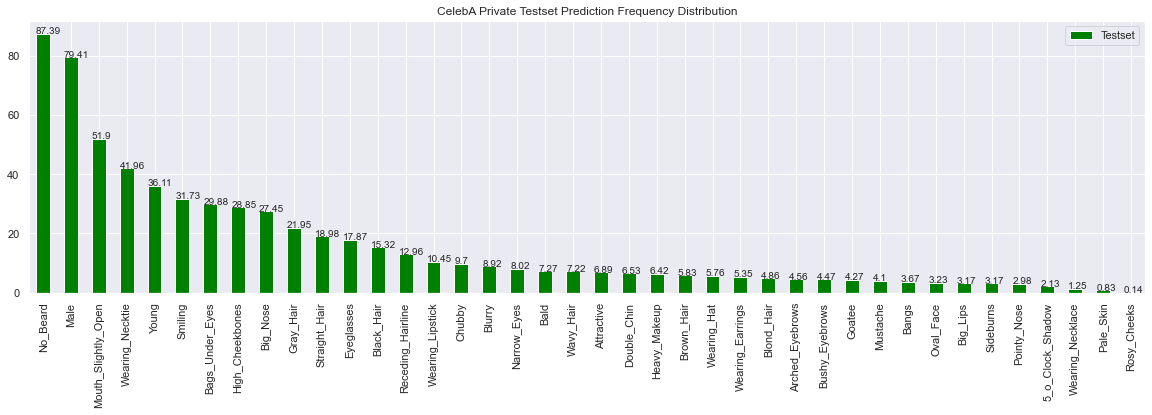

In [15]:
stat_df = pd.DataFrame(index = attribute_names)
stat_df.loc[:,'Testset'] = (preds.iloc[:,:] == 1).mean(axis=0)*100
stat_df = stat_df.sort_values('Testset', ascending=False)
fig, ax = plt.subplots()
stat_df.plot(title='CelebA Private Testset Prediction Frequency Distribution', 
             kind='bar', figsize=(20, 5), ax=ax, color='green')
for p in ax.patches:
    value = round(p.get_height(),2)
    ax.annotate(str(value), xy=(p.get_x(), p.get_height()))
plt.savefig('private_test.png',dpi=160, bbox_inches='tight')
print(preds[(preds['Young']==1) & (preds['Gray_Hair']==1)].index)
print(preds[(preds['Male']==-1) & (preds['Mustache']==1)].index)
print(preds[(preds['Male']==-1) & (preds['Goatee']==1)].index)
print(preds[(preds['Gray_Hair']==1) & (preds['Blond_Hair']==1)].index)
print(preds[(preds['Male']==-1) & (preds['No_Beard']==-1)].index)

In [16]:
print(preds[(preds['Rosy_Cheeks']==1) & (preds['Rosy_Cheeks']==1)].index)
print(len(preds[(preds['Rosy_Cheeks']==1) & (preds['Rosy_Cheeks']==1)].index))
print(preds[(preds['Wearing_Necklace']==1) & (preds['Wearing_Necklace']==1)].index)
print(len(preds[(preds['Wearing_Necklace']==1) & (preds['Wearing_Necklace']==1)].index))

Index(['Britney_Spears_0001.jpg', 'Britney_Spears_0002.jpg',
       'Britney_Spears_0003.jpg', 'Britney_Spears_0004.jpg',
       'Britney_Spears_0005.jpg', 'Britney_Spears_0014.jpg',
       'Daisy_Fuentes_0003.jpg', 'Elizabeth_Taylor_0001.jpg',
       'Hillary_Clinton_0004.jpg', 'Jennifer_Lopez_0003.jpg',
       'Jennifer_Lopez_0016.jpg', 'Kristin_Davis_0002.jpg',
       'Natalie_Imbruglia_0001.jpg', 'Nia_Vardalos_0002.jpg',
       'Nia_Vardalos_0005.jpg', 'Renee_Zellweger_0003.jpg',
       'Rita_Moreno_0002.jpg', 'Svetlana_Koroleva_0001.jpg'],
      dtype='object', name='Images')
18
Index(['Alexa_Loren_0001.jpg', 'Alicia_Keys_0001.jpg',
       'Angela_Lansbury_0001.jpg', 'Aretha_Franklin_0001.jpg',
       'Beatriz_Merino_0001.jpg', 'Britney_Spears_0004.jpg',
       'Britney_Spears_0006.jpg', 'Britney_Spears_0014.jpg',
       'Brooke_Gordon_0001.jpg', 'Carla_Tricoli_0001.jpg',
       ...
       'Tippi_Hedren_0001.jpg', 'Tippi_Hedren_0002.jpg',
       'Toni_Braxton_0002.jpg', 'Toni_Brax

In [17]:
inv_normalize = transforms.Normalize(
   mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
   std=[1/0.229, 1/0.224, 1/0.225]
)

def get_celeb_prediction(preds, name, first_img=False):
    celeb_preds = preds[preds.index.str.contains(name)]
    celeb_first = celeb_preds.index[0]
    celeb_stat = pd.DataFrame(index = attribute_names)
    celeb_stat.loc[:,name] = (celeb_preds.iloc[:,:] == 1).mean(axis=0)*100
    mycolor = 'skyblue' if celeb_stat.loc['Male',name] >= 50 else 'magenta'
    celeb_stat = celeb_stat.sort_values(name, ascending=False)
    ncols = 3 if first_img else 2
    ax = plt.subplot2grid((1, ncols), (0, 0), colspan=2)
    celeb_stat.plot(title=name+' Prediction Frequency Distribution', 
                 kind='bar', figsize=(20, 5), color=mycolor, ax=ax)
    for p in ax.patches:
        value = round(p.get_height(),2)
        ax.annotate(str(value), xy=(p.get_x(), p.get_height()))
    if first_img:
        ax2 = plt.subplot2grid((1, ncols), (0, 2), colspan=1)
        index = test_dataset.imagenames.index(celeb_first)    
        s_img = inv_normalize(test_dataset[index][0]).permute(1, 2, 0)
        ax2.imshow(s_img)
        ax2.set_axis_off()
        plt.title(celeb_first)
        plt.tight_layout()
    plt.show()

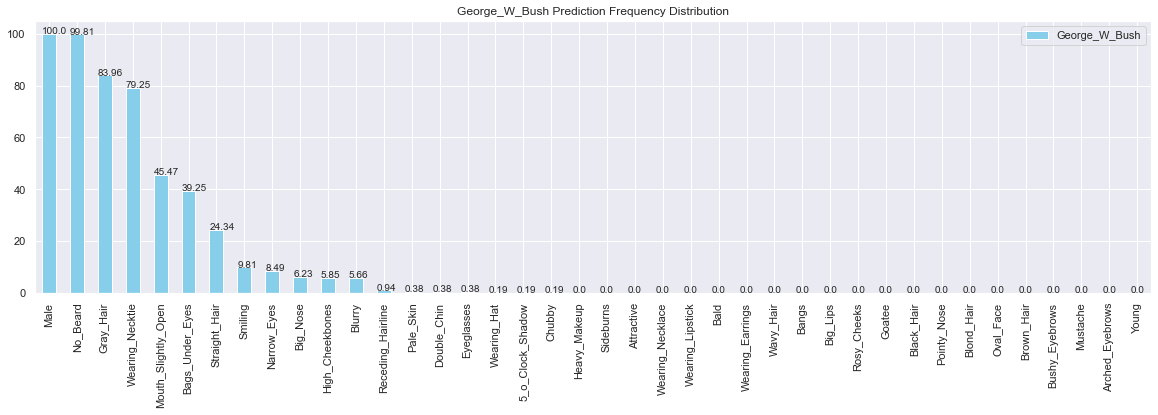

In [18]:
get_celeb_prediction(preds, name = 'George_W_Bush') # Male, Gray_Hair, Blonde, Necktie